# Cat and Dog Image Classification

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.applications.vgg19 import VGG19
from keras.preprocessing.image import ImageDataGenerator

## Obtain and Organize the Data Sets

The data is divided into training set (25,000 images) and testing set (10,000 images). For this homework, we are going to use 4,000 images (2,000 cat images and 2,000 dog images) from the original training data for training, 1,000 images for validation, and 1,000 images for testing.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os

### Unzip the Data Set###


In [ ]:
!unzip ./dogs-vs-cats-small.zip

In [ ]:
data_dir = './dogs-vs-cats-small/'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
# Instantiate three image generator classes:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    data_format='channels_last')

valid_datagen = ImageDataGenerator(
    rescale=1.0/255,
    data_format='channels_last')

test_datagen = ImageDataGenerator(
    rescale=1.0/255,
    data_format='channels_last'
)

In [ ]:
batch_size=32
train_generator = train_datagen.flow_from_directory(
    directory=data_dir + 'train',
    target_size=(224, 224),
    classes=['cat','dog'],
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    seed=42)

valid_generator = valid_datagen.flow_from_directory(
    directory=data_dir + 'validation',
    target_size=(224, 224),
    classes=['cat','dog'],
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    seed=42)

test_generator = test_datagen.flow_from_directory(
    directory=data_dir + 'test',
    target_size=(224, 224),
    classes=['cat','dog'],
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    seed=42)

Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## 1. Build and Train a Baseline Model

We will start with building a simple convolutional neural network.

### Define the model

* Input image: 224 (height) x 224 (width) x 3 (channels)
* Convolution: 16 kernels (size = 3 x 3), stride = 1, padding = 1
* MaxPool: kernel size = 2 x 2, stride = 2, padding = 0
* Convolution: 32 kernels (size = 3 x 3), stride = 1, padding = 1
* MaxPool: kernel size = 2 x 2, stride = 2, padding = 0
* Convolution: 64 kernels (size = 3 x 3), stride = 1, padding = 1
* MaxPool: kernel size = 2 x 2, stride = 2, padding = 0
* Dense: 128 fully connected neurons
* Output: 2 classes


In [ ]:

model = Sequential()

# First Block
model.add(Conv2D(16, kernel_size = (3,3), strides = (1,1), activation = 'relu',
                 input_shape = (224,224,3)))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
model.add(BatchNormalization())

# Second Block
model.add(Conv2D(32, kernel_size = (3,3), strides = (1,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
model.add(BatchNormalization())

# Third Block
model.add(Conv2D(64, kernel_size = (3,3), strides = (2,2), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
model.add(BatchNormalization())

# Dense layer
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(2, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 16)      0         
 g2D)                                                            
                                                                 
 batch_normalization_4 (Bat  (None, 111, 111, 16)      64        
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                      

In [ ]:

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, batch_size= 32, epochs=10,
                    verbose=1, validation_data=valid_generator, shuffle=True)

Epoch 1/10
125/125 [==============================] - 28s 204ms/step - loss: 1.9400 - accuracy: 0.6200 - val_loss: 1.0657 - val_accuracy: 0.5000
Epoch 2/10
125/125 [==============================] - 26s 205ms/step - loss: 0.8337 - accuracy: 0.7085 - val_loss: 1.5609 - val_accuracy: 0.5000
Epoch 3/10
125/125 [==============================] - 28s 221ms/step - loss: 0.4494 - accuracy: 0.8018 - val_loss: 1.0327 - val_accuracy: 0.5770
Epoch 4/10
125/125 [==============================] - 26s 207ms/step - loss: 0.3225 - accuracy: 0.8687 - val_loss: 0.6259 - val_accuracy: 0.7190
Epoch 5/10
125/125 [==============================] - 26s 210ms/step - loss: 0.2504 - accuracy: 0.9000 - val_loss: 0.5927 - val_accuracy: 0.7310
Epoch 6/10
125/125 [==============================] - 26s 209ms/step - loss: 0.1935 - accuracy: 0.9233 - val_loss: 0.6349 - val_accuracy: 0.7430
Epoch 7/10
125/125 [==============================] - 25s 197ms/step - loss: 0.1403 - accuracy: 0.9460 - val_loss: 0.7391 - val_ac

In [ ]:

def plot_learning_curve(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

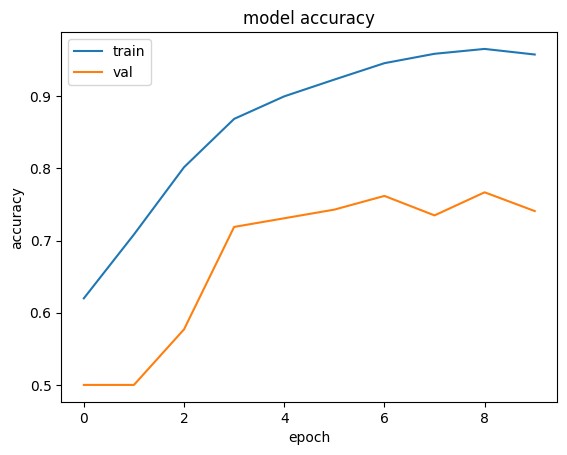

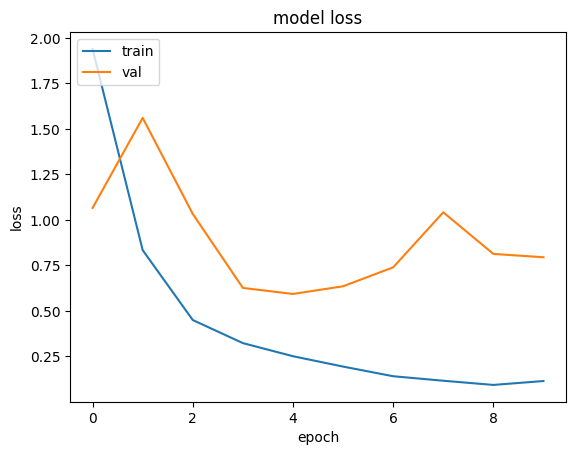

In [ ]:
plot_learning_curve(history)

In [ ]:

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

32/32 [==============================] - 5s 150ms/step - loss: 0.9417 - accuracy: 0.7080
Test Loss: 0.9417
Test Accuracy: 70.80%


## Improve the Baseline Model

I implemented an additional dense layer after the existing one which may help the model learn more complex patterns with a higher capacity. The model was able to learn better and had a higher validation accuracy. The overall accuracy also increased from ~70% to 76.10%

In [ ]:

model2 = Sequential()

# First Block
model2.add(Conv2D(16, kernel_size = (3,3), strides = (1,1), activation = 'relu',
                 input_shape = (224,224,3)))
model2.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
model2.add(BatchNormalization())

# Second Block
model2.add(Conv2D(32, kernel_size = (3,3), strides = (1,1), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
model2.add(BatchNormalization())

# Third Block
model2.add(Conv2D(64, kernel_size = (3,3), strides = (2,2), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
model2.add(BatchNormalization())

# Dense layer
model2.add(Flatten())
model2.add(Dense(128, activation = 'relu'))
model2.add(Dropout(0.5))

# Additional Dense layer
model2.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model2.add(Dense(2, activation = 'softmax'))

In [ ]:
model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 111, 111, 16)      0         
 ng2D)                                                           
                                                                 
 batch_normalization_10 (Ba  (None, 111, 111, 16)      64        
 tchNormalization)                                               
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 54, 54, 32)        0         
 ng2D)                                                           
                                                      

In [ ]:
history2 = model2.fit(train_generator, batch_size= 64, epochs=10,
                    verbose=1, validation_data=valid_generator, shuffle=True)

Epoch 1/10
125/125 [==============================] - 28s 208ms/step - loss: 1.1907 - accuracy: 0.5850 - val_loss: 0.8142 - val_accuracy: 0.5040
Epoch 2/10
125/125 [==============================] - 25s 203ms/step - loss: 0.8460 - accuracy: 0.6365 - val_loss: 1.2068 - val_accuracy: 0.5000
Epoch 3/10
125/125 [==============================] - 26s 209ms/step - loss: 0.6488 - accuracy: 0.6960 - val_loss: 0.7003 - val_accuracy: 0.5670
Epoch 4/10
125/125 [==============================] - 25s 200ms/step - loss: 0.5639 - accuracy: 0.7365 - val_loss: 0.6282 - val_accuracy: 0.6370
Epoch 5/10
125/125 [==============================] - 27s 219ms/step - loss: 0.4352 - accuracy: 0.7997 - val_loss: 0.5336 - val_accuracy: 0.7340
Epoch 6/10
125/125 [==============================] - 25s 201ms/step - loss: 0.3691 - accuracy: 0.8305 - val_loss: 0.5239 - val_accuracy: 0.7560
Epoch 7/10
125/125 [==============================] - 26s 206ms/step - loss: 0.2981 - accuracy: 0.8763 - val_loss: 0.4977 - val_ac

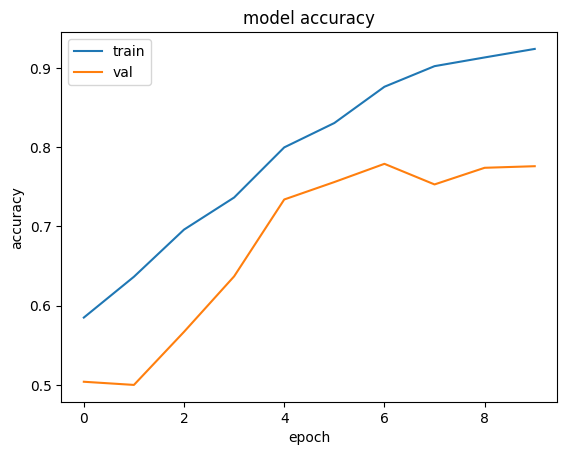

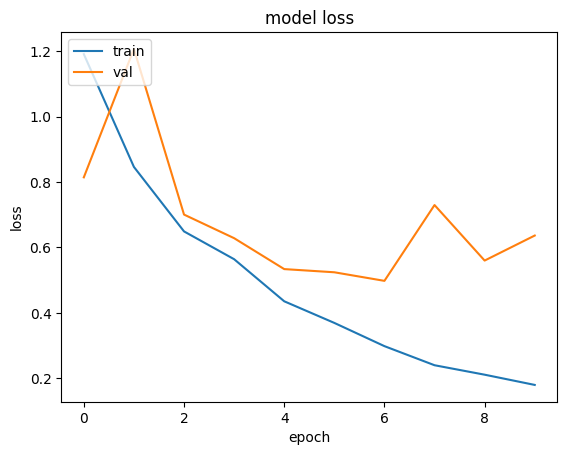

In [ ]:
plot_learning_curve(history2)

In [ ]:
test_loss, test_accuracy = model2.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

32/32 [==============================] - 5s 162ms/step - loss: 0.7793 - accuracy: 0.7610
Test Loss: 0.7793
Test Accuracy: 76.10%


## 3. Transfer Learning

Next, we are going to fine-tune [VGG19](https://arxiv.org/abs/1409.1556) on our small dogs-vs-cats dataset. Specifically, we will load the VGG19 model pre-trained on ImageNet, freeze its weights, add some new layers on top of the frozen layers from VGG19, and train the new layers on our dataset. You need to add an output classification layer on top of the base VGG19 model.



In [ ]:
vgg19 = VGG19(include_top=False,
              weights='imagenet',
              input_shape=(224,224,3),
              pooling=None)
for layer in vgg19.layers:
  layer.trainable = False

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
# Add classification layer
model3 = Sequential()
model3.add(vgg19)

model3.add(Flatten(name = 'flattened'))
model3.add(Dropout(0.5))
model3.add(Dense(2, activation = 'softmax', name = 'predictions'))

In [ ]:
model3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
history3 = model3.fit(train_generator, steps_per_epoch = 15, epochs=10,
                    verbose=1, validation_data=valid_generator,validation_steps = 15)

Epoch 1/10
15/15 [==============================] - 14s 428ms/step - loss: 1.2228 - accuracy: 0.5979 - val_loss: 0.8740 - val_accuracy: 0.5833
Epoch 2/10
15/15 [==============================] - 5s 360ms/step - loss: 0.5305 - accuracy: 0.7458 - val_loss: 0.3921 - val_accuracy: 0.8062
Epoch 3/10
15/15 [==============================] - 6s 378ms/step - loss: 0.3556 - accuracy: 0.8562 - val_loss: 0.3375 - val_accuracy: 0.8354
Epoch 4/10
15/15 [==============================] - 7s 462ms/step - loss: 0.3083 - accuracy: 0.8562 - val_loss: 0.2850 - val_accuracy: 0.8833
Epoch 5/10
15/15 [==============================] - 9s 596ms/step - loss: 0.3063 - accuracy: 0.8708 - val_loss: 0.4535 - val_accuracy: 0.8167
Epoch 6/10
15/15 [==============================] - 8s 554ms/step - loss: 0.4587 - accuracy: 0.8021 - val_loss: 0.3677 - val_accuracy: 0.8479
Epoch 7/10
15/15 [==============================] - 6s 383ms/step - loss: 0.2897 - accuracy: 0.8729 - val_loss: 0.2867 - val_accuracy: 0.8667
Epoch

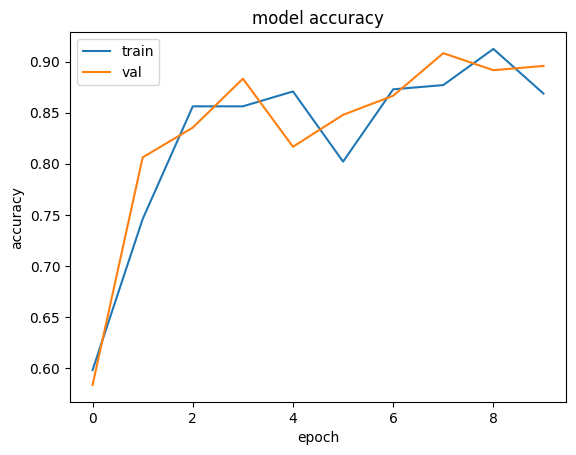

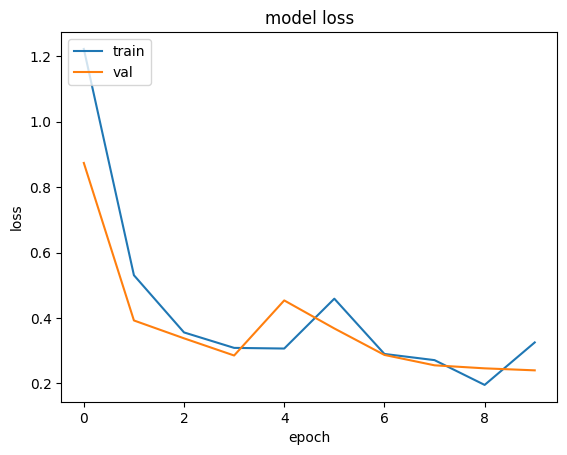

In [ ]:
plot_learning_curve(history3)

In [ ]:
test_loss, test_accuracy = model3.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

32/32 [==============================] - 8s 251ms/step - loss: 0.3286 - accuracy: 0.8620
Test Loss: 0.3286
Test Accuracy: 86.20%


## 4. Improving Model Performance Again

I added data augmentation to the training data by rotating the images, shifting them, and flipping them to add diversity to the training data (more complexity = better learning)

In [ ]:
# Add data augmentation - in this case i want to apply a few transformations
# This should artificially increase the diversity of the training data (i.e more complex)
train_datagen_augmented = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20, # rotate Images 20 degrees
    width_shift_range=0.2, # horizontal shift percentage
    height_shift_range=0.2, # vertical shift percentage
    shear_range=0.2, # applies transformation that displaces pixels in a fixed direction
    zoom_range=0.2, # zoom in 0.2
    horizontal_flip=True, # flips images along the horizontal axis
    fill_mode='nearest' # replaces empty areas from transformations with nearest pixel values
)

# Create augmented data generator
train_generator_augmented = train_datagen_augmented.flow_from_directory(
    directory=data_dir + 'train',
    target_size=(224, 224),
    classes=['cat', 'dog'],
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    seed=42
)

# Augmented model
model3_augmented = Sequential()
model3_augmented.add(vgg19)
model3_augmented.add(Flatten(name='flattened'))
model3_augmented.add(Dropout(0.5))
model3_augmented.add(Dense(256, activation='relu'))  # More neurons in Dense layer
model3_augmented.add(BatchNormalization())
model3_augmented.add(Dropout(0.5))
model3_augmented.add(Dense(2, activation='softmax', name='predictions'))

# Compile the augmented model
model3_augmented.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the augmented model
history3_augmented = model3_augmented.fit(
    train_generator_augmented,
    steps_per_epoch=train_generator_augmented.samples // batch_size,
    epochs=10,
    verbose=1,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size
)

Found 4000 images belonging to 2 classes.
Epoch 1/10
125/125 [==============================] - 99s 640ms/step - loss: 0.6379 - accuracy: 0.7590 - val_loss: 0.5151 - val_accuracy: 0.8014
Epoch 2/10
125/125 [==============================] - 73s 580ms/step - loss: 0.4064 - accuracy: 0.8160 - val_loss: 0.2428 - val_accuracy: 0.9022
Epoch 3/10
125/125 [==============================] - 77s 616ms/step - loss: 0.3685 - accuracy: 0.8375 - val_loss: 0.2434 - val_accuracy: 0.9012
Epoch 4/10
125/125 [==============================] - 72s 579ms/step - loss: 0.3674 - accuracy: 0.8313 - val_loss: 0.2197 - val_accuracy: 0.9022
Epoch 5/10
125/125 [==============================] - 74s 594ms/step - loss: 0.3603 - accuracy: 0.8430 - val_loss: 0.2110 - val_accuracy: 0.9052
Epoch 6/10
125/125 [==============================] - 74s 589ms/step - loss: 0.3437 - accuracy: 0.8450 - val_loss: 0.2039 - val_accuracy: 0.9153
Epoch 7/10
125/125 [==============================] - 77s 613ms/step - loss: 0.3407 - ac

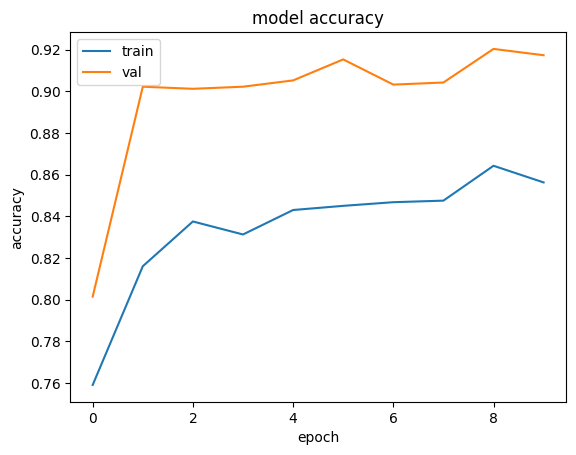

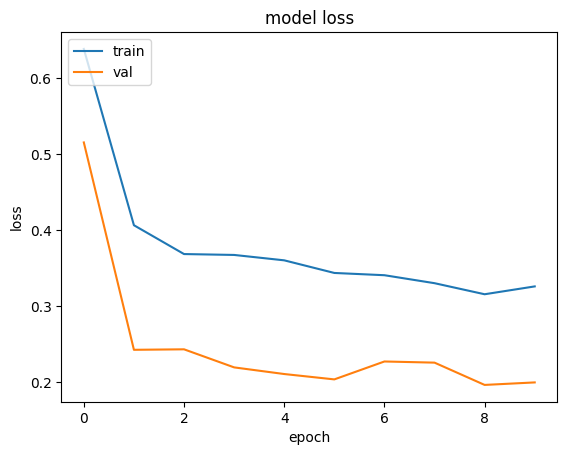

In [ ]:
plot_learning_curve(history3_augmented)

In [ ]:
test_loss, test_accuracy = model3_augmented.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

32/32 [==============================] - 6s 173ms/step - loss: 0.2539 - accuracy: 0.8840
Test Loss: 0.2539
Test Accuracy: 88.40%
